<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Check-that-Labeled-Bounding-Boxes-Match-Corresponding-Image-Areas" data-toc-modified-id="Check-that-Labeled-Bounding-Boxes-Match-Corresponding-Image-Areas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Check that Labeled Bounding Boxes Match Corresponding Image Areas</a></span><ul class="toc-item"><li><span><a href="#Load-image-and-label-and-calculate-boxes" data-toc-modified-id="Load-image-and-label-and-calculate-boxes-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load image and label and calculate boxes</a></span></li><li><span><a href="#Plot-bounding-boxes-over-image" data-toc-modified-id="Plot-bounding-boxes-over-image-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot bounding boxes over image</a></span><ul class="toc-item"><li><span><a href="#Original-Image" data-toc-modified-id="Original-Image-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Original Image</a></span></li><li><span><a href="#Image-with-plotted-labels" data-toc-modified-id="Image-with-plotted-labels-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Image with plotted labels</a></span></li></ul></li></ul></li></ul></div>

# Check that Labeled Bounding Boxes Match Corresponding Image Areas

In [42]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm
from shapely.wkt import dumps, loads
import matplotlib.patches as patches


## Load image and label and calculate boxes

In [77]:
img = mpimg.imread('images/RGB-PanSharpen_AOI_2_Vegas_img4.png')
label = pd.read_csv('labels/RGB-PanSharpen_AOI_2_Vegas_img4.txt', 
                    sep=' ',
                    header=None)
label.columns = ['type','truncated', 'occluded', 'alpha', 'minx', 'miny', 'maxx', 'maxy','height', 'width', 'length', 'locx', 'locy', 'locz', 'rotation_y']


In [78]:
# setup for patch coordinates. 

label.loc[:,'height'] = label.loc[:, 'maxy'] - label.loc[:, 'miny']
label.loc[:,'width'] = label.loc[:, 'maxx'] - label.loc[:, 'minx']

In [79]:
label.head()

type  truncated  occluded  alpha   minx    miny    maxx    maxy  \
0  building          0         0      0  870.0  1212.0  1067.0  1280.0   
1  building          0         0      0  892.0  1125.0  1082.0  1206.0   
2  building          0         0      0  877.0  1024.0  1025.0  1111.0   
3  building          0         0      0  880.0   935.0  1028.0  1013.0   
4  building          0         0      0  849.0   839.0  1023.0   909.0   

   height  width  length  locx  locy  locz  rotation_y  
0    68.0  197.0       0     0     0     0           0  
1    81.0  190.0       0     0     0     0           0  
2    87.0  148.0       0     0     0     0           0  
3    78.0  148.0       0     0     0     0           0  
4    70.0  174.0       0     0     0     0           0

In [80]:
boxes = []
for index,b in label.iterrows():
    
    boxes.append(patches.Rectangle((b['minx'],b['miny']),float(b['width']),float(b['height']),
                    linewidth=1,edgecolor='r',fill=True))


## Plot bounding boxes over image

### Original Image

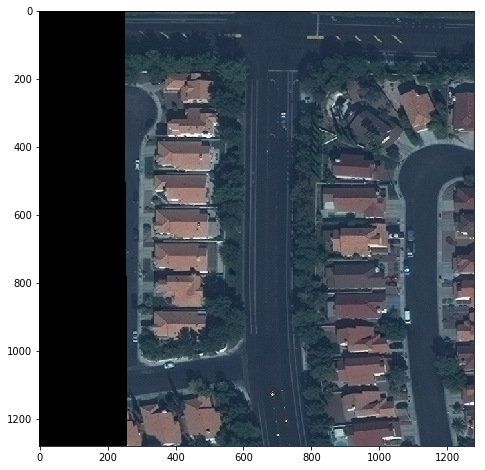

In [81]:
f = plt.figure(figsize=(8,8))
ax = f.add_subplot(111)
ax.imshow(img)


### Image with plotted labels

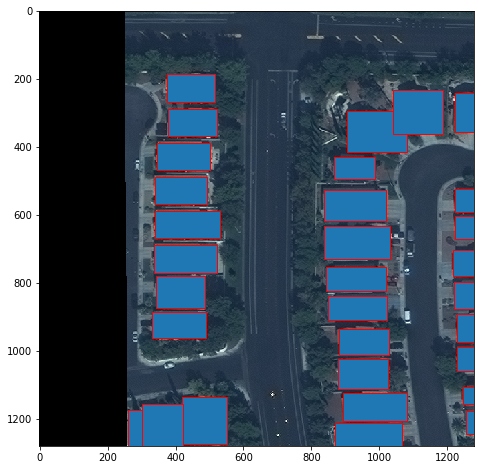

In [82]:
fig,ax = plt.subplots(1, figsize=(8,8))
ax.imshow(img)
for b in boxes:
    ax.add_patch(b)

plt.show()
